# Simulated Data

Stephen Fleming

2023.03.31

Simulate data for the CellCap perturbation response model.

In [12]:
import cellcap.validation.simulation as sim

In [ ]:
import scanpy as sc
import pandas as pd
import umap

import matplotlib.pyplot as plt
%matplotlib inline

## Load real data

In [2]:
# load some real data (to come up with a decoder)

adata = sc.read_h5ad('data/sc_levy_annotated_tiny.h5ad')
adata

AnnData object with n_obs × n_vars = 8651 × 37701
    obs: 'sample', 'donor', 'cell_type', 'condition', 'perturbation', 'clinical_diagnosis', 'age', 'sex', 'genetics', 'perturbation_category', 'perturbation_vehicle'

In [3]:
adata.obs['perturbation'].value_counts()

control    6318
CLOZ       1352
ATOR        981
Name: perturbation, dtype: int64

In [4]:
adata.obs['donor'].value_counts()

ML830-8410    4389
ML730-7078    2991
ML787-6234    1271
Name: donor, dtype: int64

In [5]:
pd.crosstab(adata.obs['donor'], adata.obs['perturbation'])

perturbation,ATOR,CLOZ,control
donor,,,
ML730-7078,275,483,2233
ML787-6234,138,201,932
ML830-8410,568,668,3153


In [6]:
# subset real data to control cells from one donor

adata = adata[(adata.obs['perturbation'] == 'control')
              & (adata.obs['donor'] == 'ML830-8410')].copy()
adata

AnnData object with n_obs × n_vars = 3153 × 37701
    obs: 'sample', 'donor', 'cell_type', 'condition', 'perturbation', 'clinical_diagnosis', 'age', 'sex', 'genetics', 'perturbation_category', 'perturbation_vehicle'

## Simulate data

In [621]:
adata_sim = sim.simulate_data_from_real_data(adata)

In [622]:
adata_sim

AnnData object with n_obs × n_vars = 2500 × 1000
    obs: 'donor', 'perturbation', 'maturity_norm', 'basal_interaction', 'donor_interaction'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'response_program_matrix', 'perturbation_response_matrix', 'decoder_weight', 'decoder_bias'
    obsm: 'delta_z_donor', 'delta_z_perturbation', 'z_basal', 'z'

## Take a look

In [623]:
# compute UMAPs in the space of z_basal, and project z UMAP into that same space

um_model = umap.UMAP().fit(adata_sim.obsm['z_basal'])

adata_sim.obsm['X_basal_umap'] = um_model.transform(adata_sim.obsm['z_basal'])
adata_sim.obsm['X_umap'] = um_model.transform(adata_sim.obsm['z'])

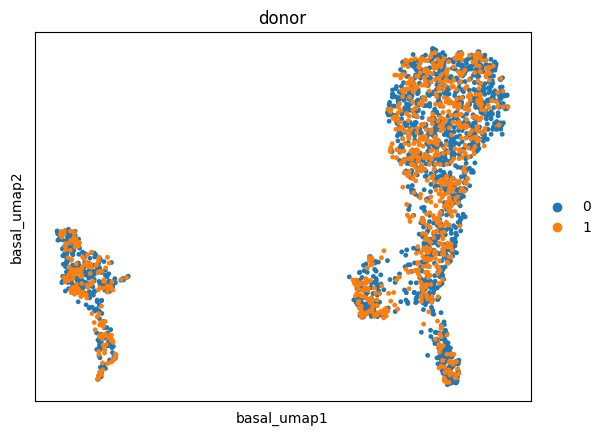

In [624]:
sc.pl.embedding(adata_sim, basis='basal_umap', color='donor')

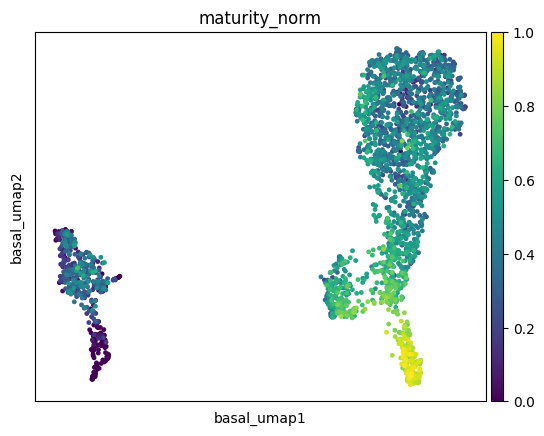

In [625]:
sc.pl.embedding(adata_sim, basis='basal_umap', color='maturity_norm')

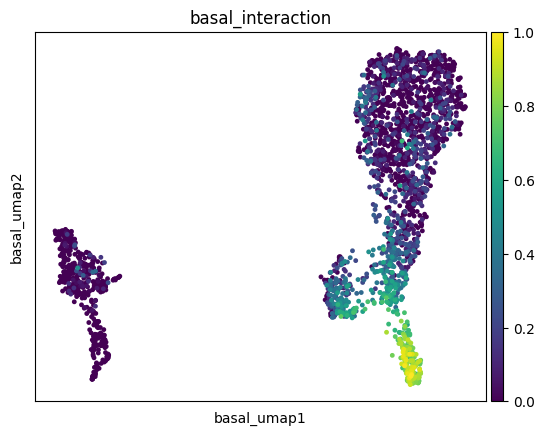

In [626]:
sc.pl.embedding(adata_sim, basis='basal_umap', color='basal_interaction', vmin=0)

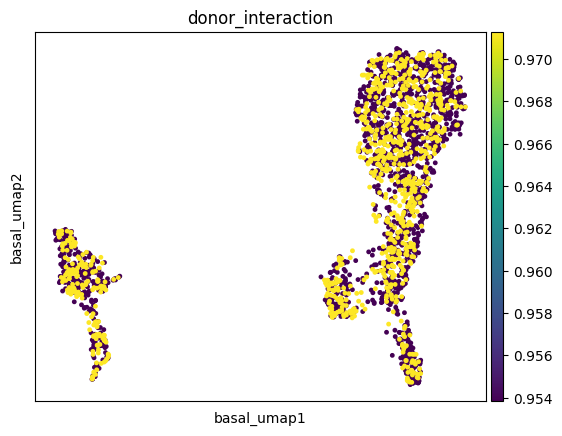

In [627]:
sc.pl.embedding(adata_sim, basis='basal_umap', color='donor_interaction')

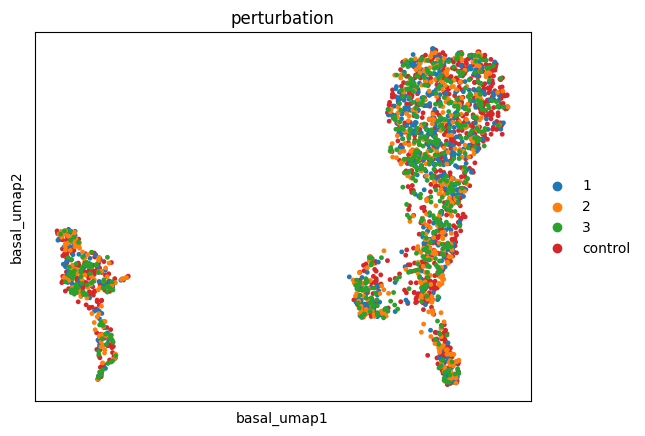

In [628]:
sc.pl.embedding(adata_sim, basis='basal_umap', color='perturbation')

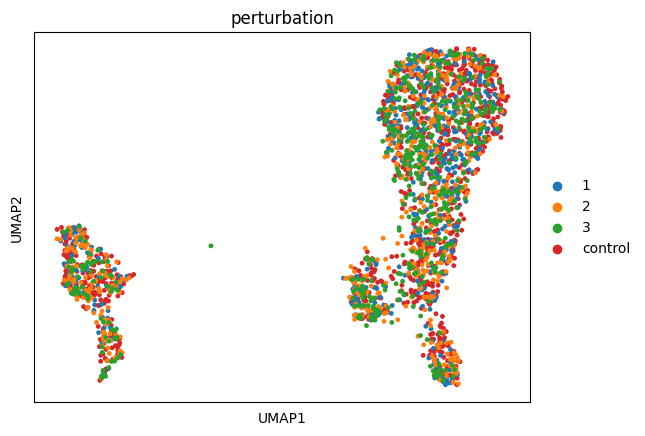

In [629]:
sc.pl.embedding(adata_sim, basis='umap', color='perturbation')